# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [6]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [50]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [9]:
import warnings
warnings.filterwarnings(action='ignore')

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [10]:
X, y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = SVR()
model.fit(train_X, train_y)

print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.17813783698679442
test data score : 0.2962129740673506


### SVM을 사용한 분류 모델 (SVC)

In [11]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

model = SVC()
model.fit(train_X, train_y)

print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9107981220657277
test data score : 0.951048951048951


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

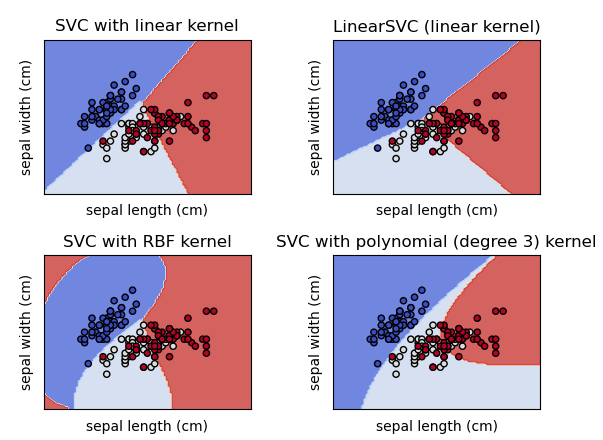

In [15]:
X, y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

linear_svr = SVR(kernel='linear')
linear_svr.fit(train_X, train_y)

print('linear train data score : {}'.format(linear_svr.score(train_X, train_y)))
print('linear test data score : {}'.format(linear_svr.score(test_X, test_y)))

linear train data score : 0.711333407603242
linear test data score : 0.6020584261391339


In [16]:
X, y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(train_X, train_y)

print('polynomial train data score : {}'.format(polynomial_svr.score(train_X, train_y)))
print('polynomial test data score : {}'.format(polynomial_svr.score(test_X, test_y)))

polynomial train data score : 0.18102103868304598
polynomial test data score : 0.2792142598616487


In [17]:
X, y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(train_X, train_y)

print('rbf train data score : {}'.format(rbf_svr.score(train_X, train_y)))
print('rbf test data score : {}'.format(rbf_svr.score(test_X, test_y)))

rbf train data score : 0.17813783698679442
rbf test data score : 0.2962129740673506


In [19]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

linear_svc = SVC(kernel='linear')
linear_svc.fit(train_X, train_y)

print('linear train data score : {}'.format(linear_svc.score(train_X, train_y)))
print('linear test data score : {}'.format(linear_svc.score(test_X, test_y)))

X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(train_X, train_y)

print('polynomial train data score : {}'.format(polynomial_svc.score(train_X, train_y)))
print('polynomial test data score : {}'.format(polynomial_svc.score(test_X, test_y)))

X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(train_X, train_y)

print('rbf train data score : {}'.format(rbf_svc.score(train_X, train_y)))
print('rbf test data score : {}'.format(rbf_svc.score(test_X, test_y)))

linear train data score : 0.9694835680751174
linear test data score : 0.958041958041958
polynomial train data score : 0.8990610328638498
polynomial test data score : 0.9440559440559441
rbf train data score : 0.9107981220657277
rbf test data score : 0.951048951048951


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [20]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# C(cost) : 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는 지를 결정함. 즉, 작을수록 많이 허용하고, 클수록 적게 허용함
# C를 작게 잡으면 underfitting, 높게 잡으면 overfitting이 일어날 수 있음
# gamma : 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정. 가우시안 함수의 표준편차와 관련되어 있음. 클수록 작은 표준편차를 갖음. 즉, 클수록 표준편차가 작은, 작을수록 표준편차가 큰 정규분포 3차원 모형
# 정리 : C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정하고, gamma는 결정 경계의 곡률을 결정한다.
polynomial_svc = SVC(kernel='poly', degree=2, C = 0.1, gamma='auto')
polynomial_svc.fit(train_X, train_y)

print('kernel = poly, degree = {}, C = {}, gamma = {}'.format(2, 0.1, 'auto'))
print('polynomial train data score : {}'.format(polynomial_svc.score(train_X, train_y)))
print('polynomial test data score : {}'.format(polynomial_svc.score(test_X, test_y)))

kernel = poly, degree = 2, C = 0.1, gamma = auto
polynomial train data score : 0.9765258215962441
polynomial test data score : 0.958041958041958


In [21]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

rbf_svc = SVC(kernel='rbf', C=2.0, gamma='scale')
rbf_svc.fit(train_X, train_y)

print('kernel = rbf, C = {}, gamma = {}'.format(2.0, 'auto'))
print('rbf train data score : {}'.format(rbf_svc.score(train_X, train_y)))
print('rbf test data score : {}'.format(rbf_svc.score(test_X, test_y)))

kernel = rbf, C = 2.0, gamma = auto
rbf train data score : 0.9131455399061033
rbf test data score : 0.951048951048951


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [34]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [31]:
# 전처리 전
model = SVC()
model.fit(train_X, train_y)

print('SVC train data score : {}'.format(model.score(train_X, train_y)))
print('SVC test data score : {}'.format(model.score(test_X, test_y)))

SVC train data score : 0.9107981220657277
SVC test data score : 0.951048951048951


In [32]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [33]:
# 전처리 후 (Standard Scaler)
model = SVC()
model.fit(train_X, train_y)

print('SVC train data score : {}'.format(model.score(train_X, train_y)))
print('SVC test data score : {}'.format(model.score(test_X, test_y)))

SVC train data score : 0.9882629107981221
SVC test data score : 0.972027972027972


In [35]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [36]:
# 전처리 후 (MinMax Scaler)
model = SVC()
model.fit(train_X, train_y)

print('SVC train data score : {}'.format(model.score(train_X, train_y)))
print('SVC test data score : {}'.format(model.score(test_X, test_y)))

SVC train data score : 0.9835680751173709
SVC test data score : 0.916083916083916


## Linear SVR

### 보스턴 주택 가격

In [216]:
X, y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [217]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [218]:
model = SVR(kernel='linear')
model.fit(train_X, train_y)

SVR(kernel='linear')

In [219]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.7101362886580534
test data score : 0.6648724901433158


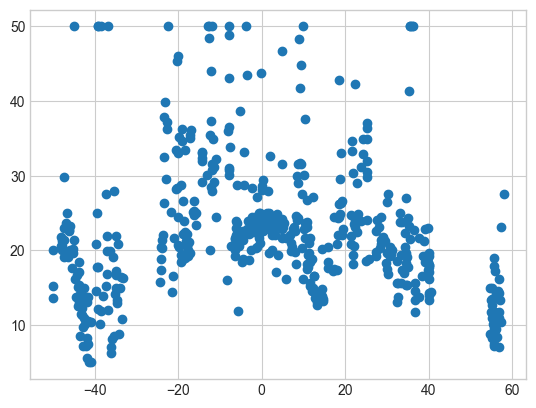

In [220]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

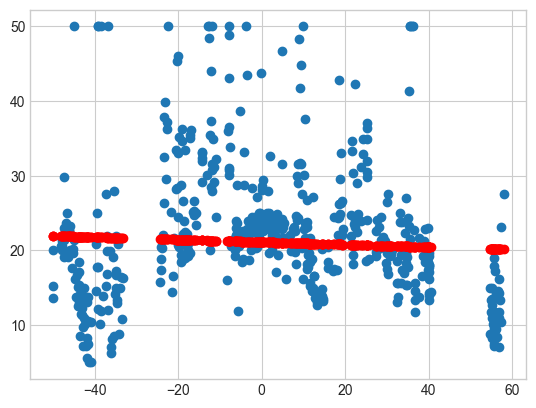

In [221]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [222]:
estimator = make_pipeline(StandardScaler(),
                        SVR(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0060215 , 0.00501776, 0.00501776, 0.00903153, 0.00802827]),
 'score_time': array([0.        , 0.00100327, 0.00100327, 0.00100374, 0.00100327]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [223]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale','auto'],
    'model__C' : [1.0, 0.1, 0.5],
    'model__epsilon' : [1.0, 0.1, 0.01]
}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [224]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.5],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [225]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])

In [226]:
gs.best_score_

0.49854468515517

### 당뇨병

In [227]:
X, y = load_diabetes(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [228]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [229]:
model = SVR(kernel='linear')
model.fit(train_X, train_y)

SVR(kernel='linear')

In [230]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.514019446813158
test data score : 0.47080487350445865


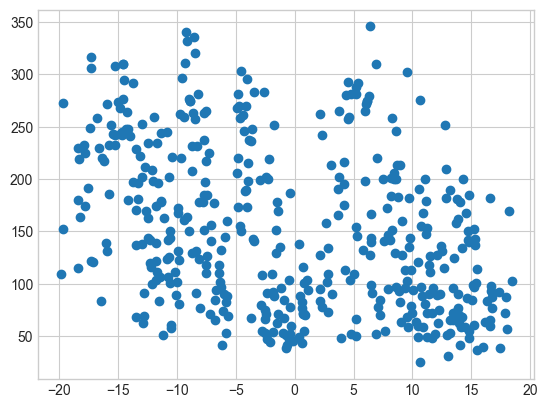

In [231]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

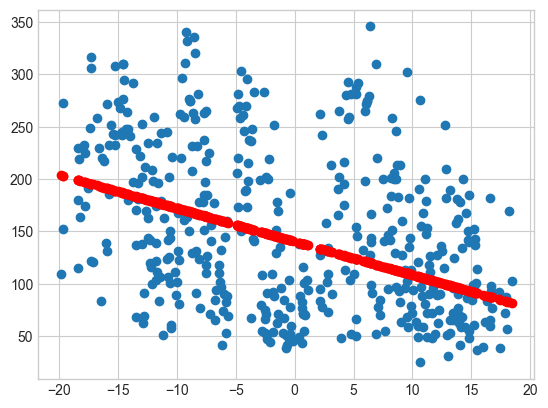

In [232]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [233]:
estimator = make_pipeline(StandardScaler(),
                        SVR(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00401378, 0.00301027, 0.00200677, 0.00301027, 0.00301027]),
 'score_time': array([0.        , 0.        , 0.0010035 , 0.        , 0.00100327]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [234]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale','auto'],
    'model__C' : [1.0, 0.1, 0.5],
    'model__epsilon' : [1.0, 0.1, 0.01]
}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [235]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.5],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [236]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

In [237]:
gs.best_score_

0.4780769992158147

## Kernel SVR

### 보스턴 주택 가격

In [238]:
X, y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [239]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [240]:
model = SVR(kernel='rbf')
model.fit(train_X, train_y)

SVR()

In [241]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.6588538556440676
test data score : 0.6516429887336648


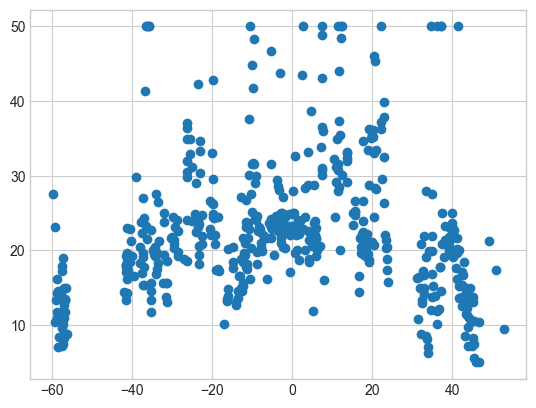

In [242]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

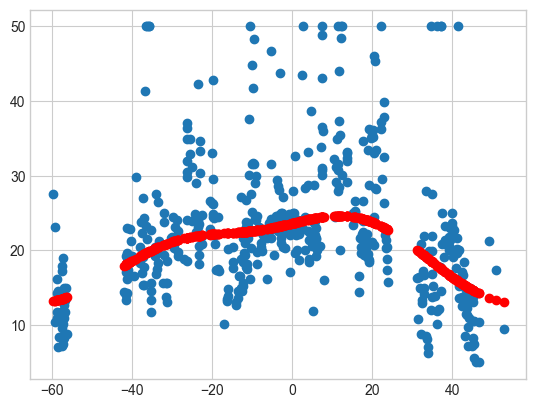

In [243]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [244]:
estimator = make_pipeline(StandardScaler(),
                        SVR(kernel='rbf'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00401378, 0.00502372, 0.00401378, 0.00402045, 0.00601912]),
 'score_time': array([0.00100994, 0.00300169, 0.00200486, 0.00199866, 0.00200701]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [245]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{
    'model__kernel' : ['rbf', 'polynomial', 'sigmoid']
}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [246]:
gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [247]:
gs.best_params_

{'model__kernel': 'rbf'}

In [248]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [249]:
gs.best_score_

0.17631266230186618

In [250]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
    'model__epsilon' : [1.0, 0.1, 0.01]
}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [251]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [252]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])

In [253]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}

In [254]:
gs.best_score_

0.1780747543330848

### 당뇨병

In [255]:
X, y = load_diabetes(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [256]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [257]:
model = SVR(kernel='rbf')
model.fit(train_X, train_y)

SVR()

In [258]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.14166225488775774
test data score : 0.1611866149263278


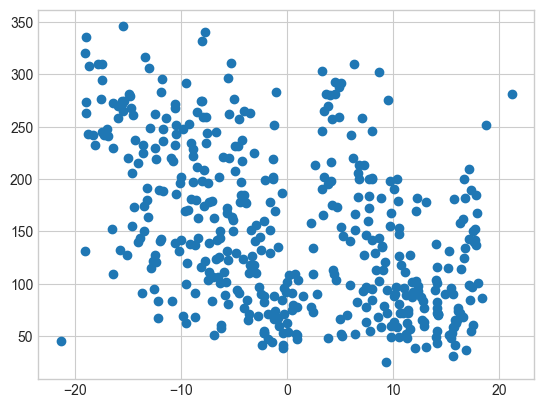

In [259]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

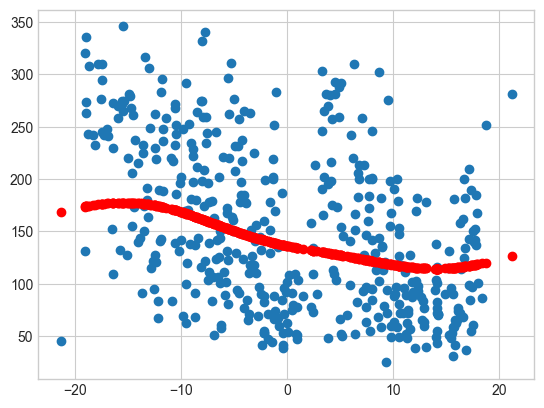

In [260]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r');

In [261]:
estimator = make_pipeline(StandardScaler(),
                        SVR(kernel='rbf'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00301027, 0.00401306, 0.0050168 , 0.00401354, 0.00401354]),
 'score_time': array([0.00200653, 0.00301123, 0.00200748, 0.00200748, 0.00200748]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [262]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='rbf'))])

param_grid = [{
    'model__kernel' : ['rbf', 'polynomial', 'sigmoid']
}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [263]:
gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=-1,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [264]:
gs.best_params_

{'model__kernel': 'sigmoid'}

In [265]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [266]:
gs.best_score_

0.3491358880113567

In [267]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVR(kernel='sigmoid'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
    'model__epsilon' : [1.0, 0.1, 0.01]
}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [268]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [269]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [270]:
gs.best_params_

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}

In [271]:
gs.best_score_

0.35001409316735377

In [272]:
model = gs.best_estimator_
model.fit(train_X, train_y)

print('SVC train data score : {}'.format(model.score(train_X, train_y)))
print('SVC test data score : {}'.format(model.score(test_X, test_y)))

SVC train data score : 0.3424247665227913
SVC test data score : 0.3477671205915789


## Linear SVC

### 유방암

In [273]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [274]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [275]:
model = SVC(kernel='linear')
model.fit(train_X, train_y)

SVC(kernel='linear')

In [276]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9899497487437185
test data score : 0.9766081871345029


In [277]:
def make_meshgrid(x, y, h = 0.2):
    min_x, max_x = min(x) - 1, max(x) + 1
    min_y, max_y = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    return xx, yy

In [278]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [279]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

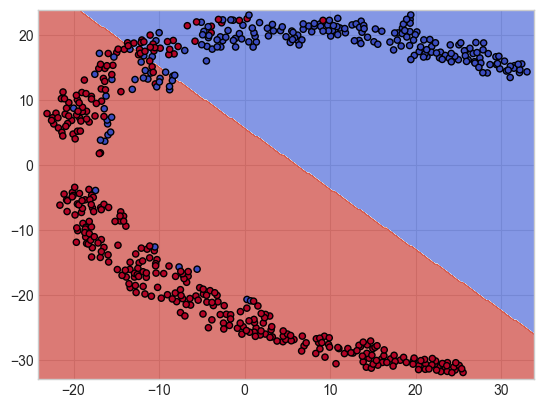

In [280]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [281]:
estimator = make_pipeline(StandardScaler(),
                        SVC(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00401378, 0.00301051, 0.00301027, 0.00301027, 0.00301027]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [282]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [283]:
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [284]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

In [285]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [286]:
gs.best_score_

0.9736531594472908

### 붓꽃

In [287]:
X, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [288]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [289]:
model = SVC(kernel='linear')
model.fit(train_X, train_y)

SVC(kernel='linear')

In [290]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9714285714285714
test data score : 0.9777777777777777


In [291]:
def make_meshgrid(x, y, h = 0.2):
    min_x, max_x = min(x) - 1, max(x) + 1
    min_y, max_y = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    return xx, yy

In [292]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [293]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

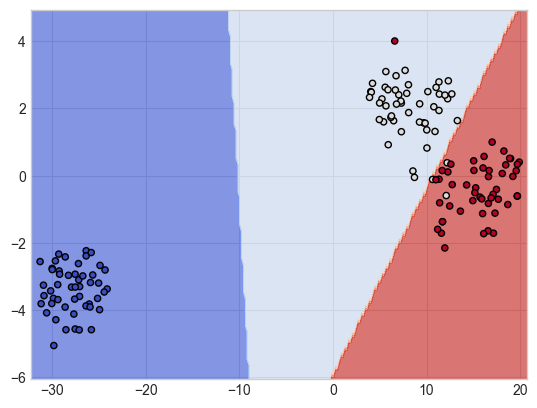

In [294]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [295]:
estimator = make_pipeline(StandardScaler(),
                        SVC(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00100374, 0.        , 0.00100398, 0.00100398, 0.00100303]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [296]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [297]:
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [298]:
gs.best_params_

{'model__C': 1.0, 'model__gamma': 'scale'}

In [299]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [300]:
gs.best_score_

0.9666666666666668

### 와인

In [301]:
X, y = load_wine(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [302]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [303]:
model = SVC(kernel='linear')
model.fit(train_X, train_y)

SVC(kernel='linear')

In [304]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 1.0
test data score : 0.9814814814814815


In [305]:
def make_meshgrid(x, y, h = 0.2):
    min_x, max_x = min(x) - 1, max(x) + 1
    min_y, max_y = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    return xx, yy

In [306]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [307]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

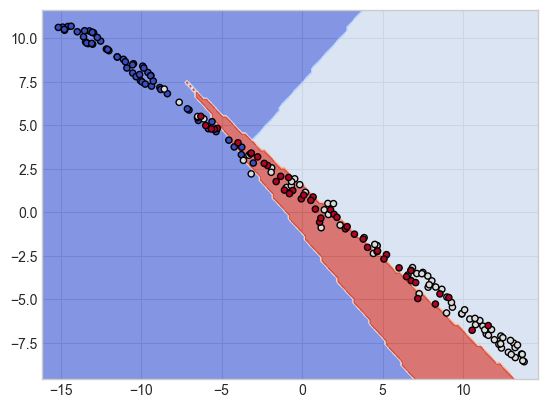

In [308]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [309]:
estimator = make_pipeline(StandardScaler(),
                        SVC(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.        , 0.00100327, 0.        , 0.0010035 , 0.0010035 ]),
 'score_time': array([0.00100327, 0.        , 0.0010035 , 0.        , 0.        ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [310]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [311]:
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [312]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

In [313]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [314]:
gs.best_score_

0.972063492063492

## Kernel SVC

### 유방암

In [166]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [315]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [316]:
model = SVC(kernel='rbf')
model.fit(train_X, train_y)

SVC()

In [317]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 1.0
test data score : 0.9814814814814815


In [318]:
def make_meshgrid(x, y, h = 0.2):
    min_x, max_x = min(x) - 1, max(x) + 1
    min_y, max_y = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    return xx, yy

In [319]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [320]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

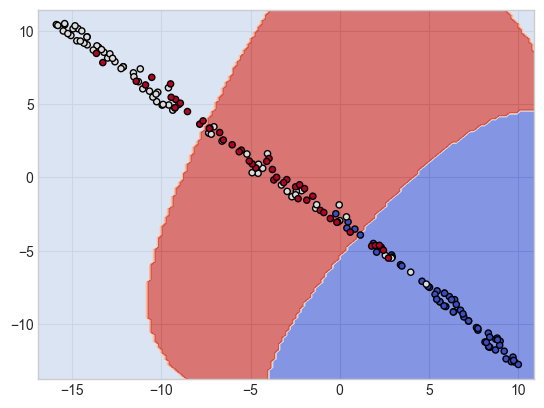

In [321]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [322]:
estimator = make_pipeline(StandardScaler(),
                        SVC(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.0010035 , 0.0010035 , 0.00100327, 0.00100327, 0.        ]),
 'score_time': array([0.        , 0.        , 0.        , 0.        , 0.00100374]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [323]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [324]:
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [325]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

In [326]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [327]:
gs.best_score_

0.972063492063492

### 붓꽃

In [328]:
X, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [329]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [330]:
model = SVC(kernel='rbf')
model.fit(train_X, train_y)

SVC()

In [331]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9619047619047619
test data score : 1.0


In [332]:
def make_meshgrid(x, y, h = 0.2):
    min_x, max_x = min(x) - 1, max(x) + 1
    min_y, max_y = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    return xx, yy

In [333]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [334]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

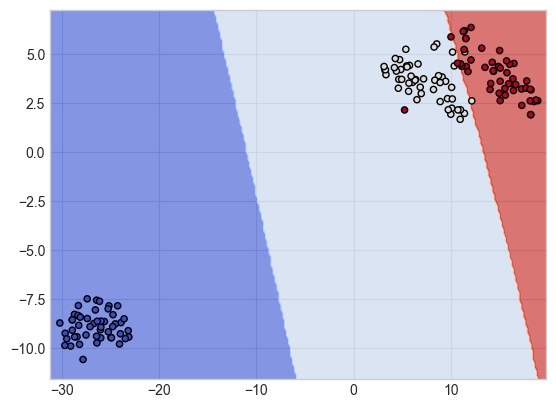

In [335]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [336]:
estimator = make_pipeline(StandardScaler(),
                        SVC(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00099564, 0.        , 0.0010035 , 0.00100398, 0.00100398]),
 'score_time': array([0.       , 0.0010035, 0.       , 0.       , 0.       ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [337]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [338]:
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [339]:
gs.best_params_

{'model__C': 1.0, 'model__gamma': 'scale'}

In [340]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [341]:
gs.best_score_

0.9666666666666668

### 와인

In [194]:
X, y = load_wine(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [204]:
model = SVC(kernel='rbf')
model.fit(train_X, train_y)

SVC()

In [205]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 1.0
test data score : 0.9814814814814815


In [206]:
def make_meshgrid(x, y, h = 0.2):
    min_x, max_x = min(x) - 1, max(x) + 1
    min_y, max_y = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    return xx, yy

In [207]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    
    return out

In [208]:
# 차원이 높기 때문에 저차원으로 변환시켜서 출력 (TSNE)
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

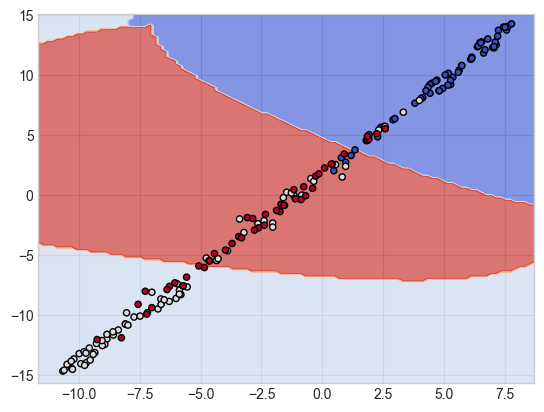

In [209]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [210]:
estimator = make_pipeline(StandardScaler(),
                        SVC(kernel='linear'),)
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00100541, 0.00100541, 0.        , 0.00100207, 0.00100327]),
 'score_time': array([0.        , 0.        , 0.00100207, 0.        , 0.        ]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [211]:
pipe = Pipeline([('scaler', StandardScaler()),
                ('model', SVC(kernel='linear'))])

param_grid = [{
    'model__gamma' : ['scale', 'auto'],
    'model__C' : [1.0, 0.1, 0.01],
}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=-1,
    cv = 5,
    verbose = True
)

In [212]:
gs.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [213]:
gs.best_params_

{'model__C': 0.1, 'model__gamma': 'scale'}

In [214]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [215]:
gs.best_score_

0.972063492063492